In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data loading
df = pd.read_csv("../data/engine_knock_data.csv")

In [3]:
df.shape

(44640, 9)

In [4]:
df.head()

,Timestamp,Knock,RPM,IgnitionTiming,CylinderPressure,BurnRate,Vibration,EGOVoltage,TempSensor
0,2025-03-01 00:00:00,True,3049.671415,10.0,21.749750,0.099312,0.517698,0.30,90.975270
1,2025-03-01 00:01:00,False,2988.355225,10.0,11.985841,3.404720,0.116183,0.45,95.947973
2,2025-03-01 00:02:00,False,3069.132122,10.0,17.683059,0.317465,0.080869,0.45,86.438296
3,2025-03-01 00:03:00,False,3158.847783,10.0,20.342996,9.693527,-0.046182,0.45,107.237910
4,2025-03-01 00:04:00,False,2985.310866,10.0,15.772882,8.902600,0.111603,0.45,95.354695


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         44640 non-null  object 
 1   Knock             44640 non-null  bool   
 2   RPM               44640 non-null  float64
 3   IgnitionTiming    44640 non-null  float64
 4   CylinderPressure  44640 non-null  float64
 5   BurnRate          44640 non-null  float64
 6   Vibration         44640 non-null  float64
 7   EGOVoltage        44640 non-null  float64
 8   TempSensor        44640 non-null  float64
dtypes: bool(1), float64(7), object(1)
memory usage: 2.8+ MB


In [6]:
df['Knock'].value_counts()

Knock
False    44416
True       224
Name: count, dtype: int64

In [7]:
# Convert knock boolean to 0/1 integers
df['Fault'] = df['Knock'].astype(int)

In [8]:
df['Fault'].value_counts()

Fault
0    44416
1      224
Name: count, dtype: int64

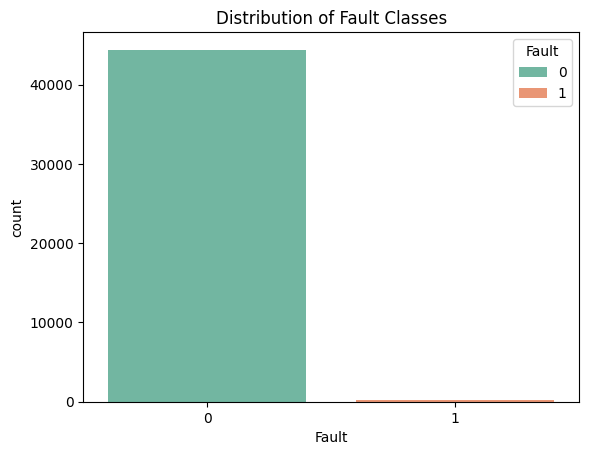

In [9]:
sns.countplot(data=df, x='Fault', palette='Set2', hue="Fault")
plt.title('Distribution of Fault Classes')
plt.show()

In [10]:
df.drop(columns=['Knock'], inplace=True)

In [11]:
df.columns

Index(['Timestamp', 'RPM', 'IgnitionTiming', 'CylinderPressure', 'BurnRate',
       'Vibration', 'EGOVoltage', 'TempSensor', 'Fault'],
      dtype='object')

In [12]:
df.drop(columns=['Timestamp'], inplace=True)

In [13]:
df.drop(columns=['IgnitionTiming'], inplace=True)

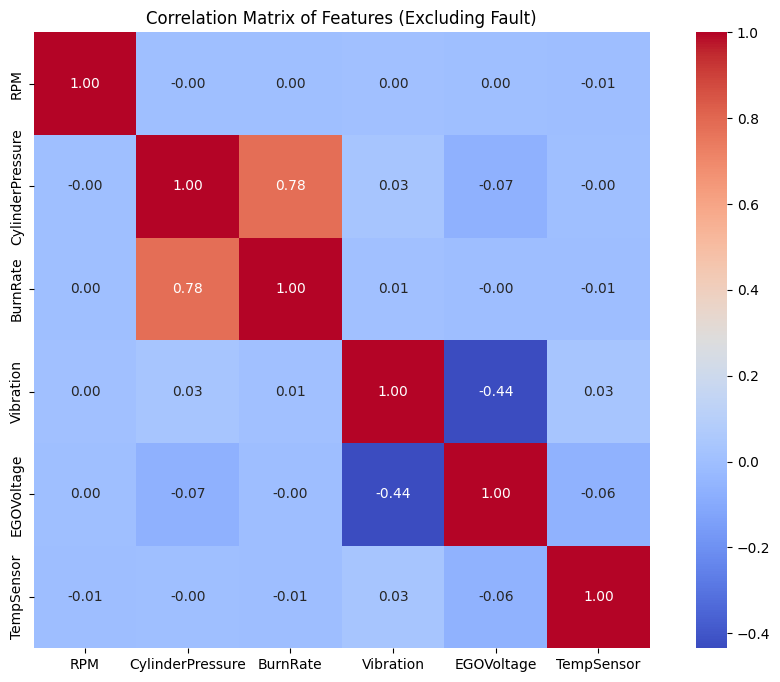

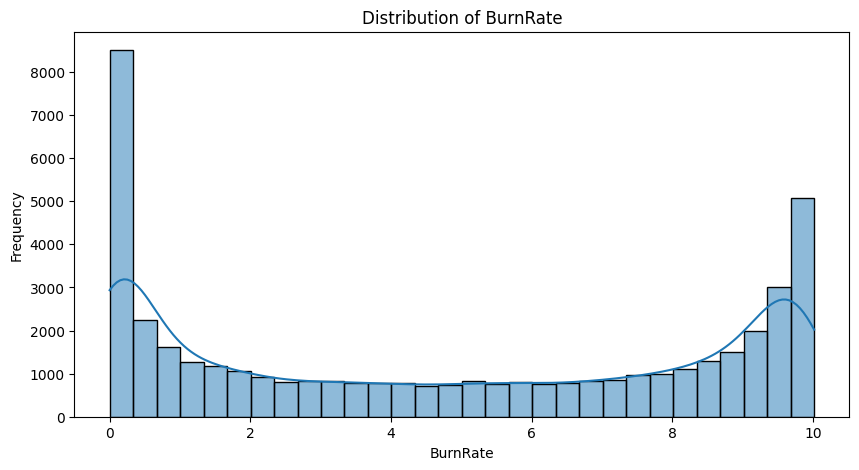

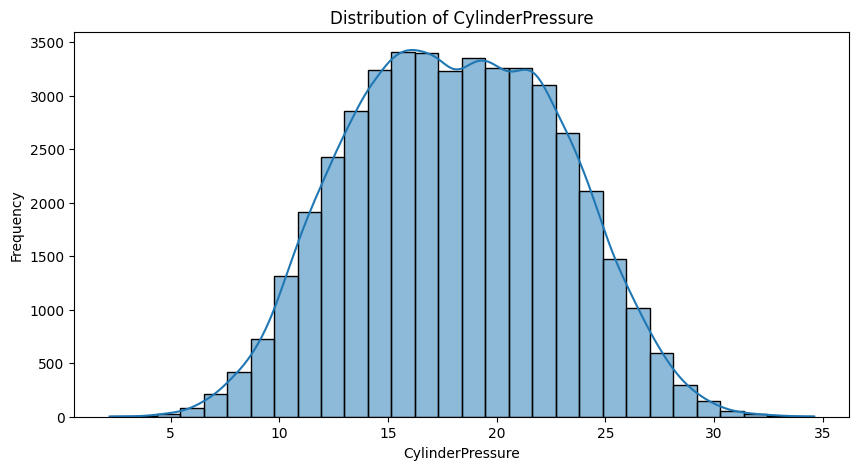

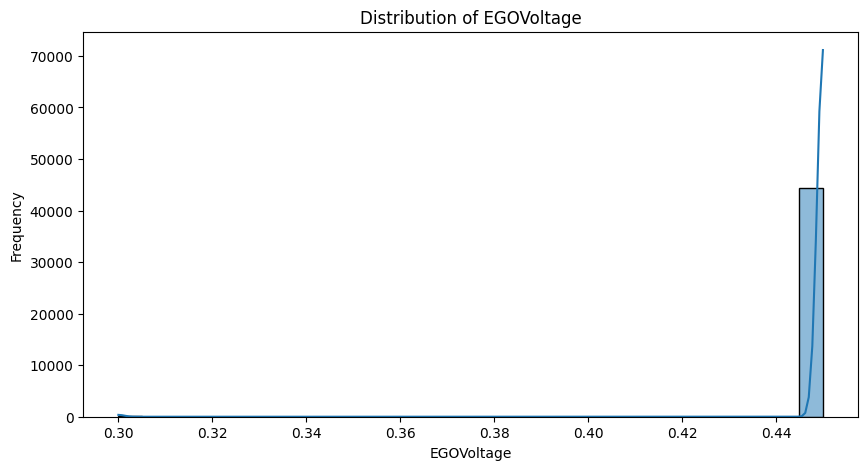

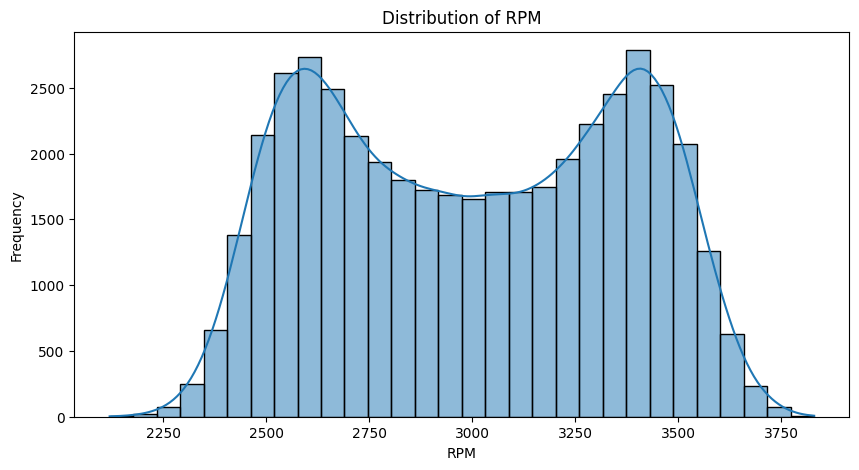

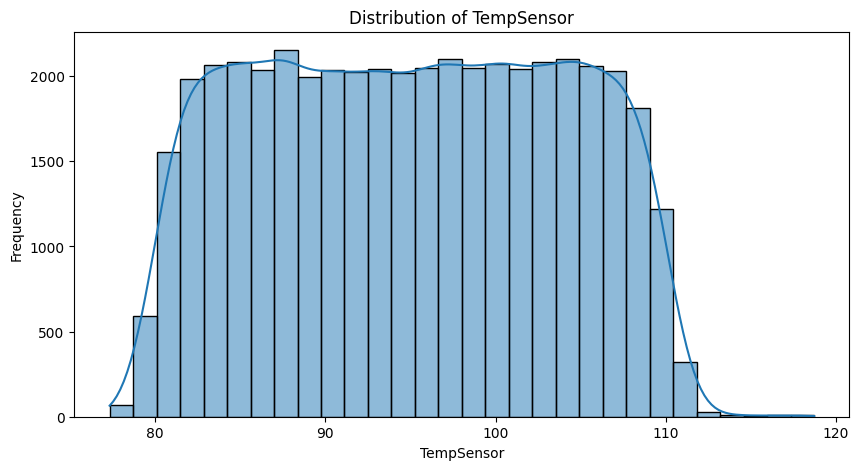

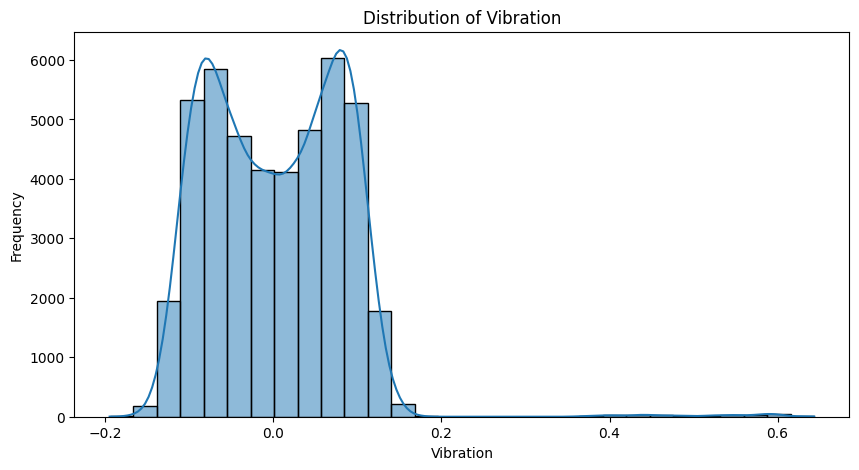

In [14]:
# Analyzing all other features except 'Fault'

# Descriptive statistics for numerical features excluding 'Fault'
descriptive_stats = df.drop(columns=['Fault']).describe()
# Correlation matrix to understand relationships between features excluding 'Fault'
correlation_matrix = df.drop(columns=['Fault']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features (Excluding Fault)')
plt.show()

# Visualizing distributions of key features excluding 'Fault'
features_to_analyze = df.columns.difference(['Fault'])
for feature in features_to_analyze:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [16]:
# Splitting the data into features and target variable
X = df.drop(columns=['Fault'])
y = df['Fault']

# Splitting the data into training and testing sets with 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True, stratify=y)

In [17]:
y_train

31848    0
35523    0
33247    0
44135    0
8719     0
        ..
16067    0
3690     0
27062    0
37382    0
20678    0
Name: Fault, Length: 40176, dtype: int64

In [18]:
# Count unique values in training and test sets
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:") 
print(y_test.value_counts())


Training set class distribution:
Fault
0    39974
1      202
Name: count, dtype: int64

Test set class distribution:
Fault
0    4442
1      22
Name: count, dtype: int64


Model: Random Forest
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4442
           1       1.00      1.00      1.00        22

    accuracy                           1.00      4464
   macro avg       1.00      1.00      1.00      4464
weighted avg       1.00      1.00      1.00      4464



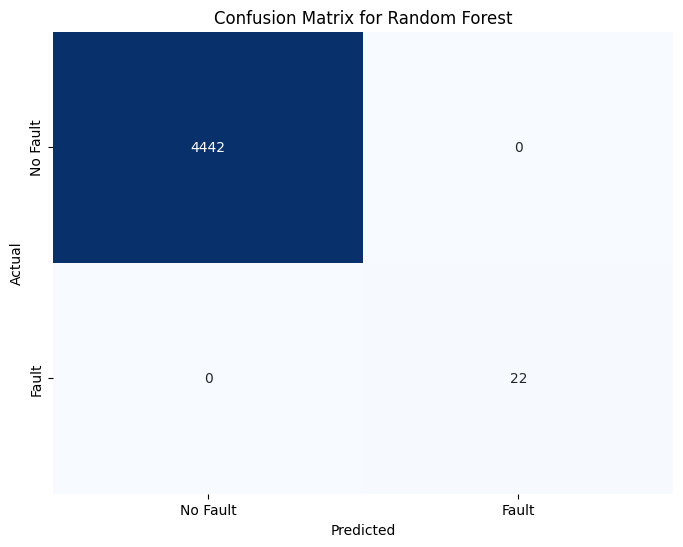

/opt/anaconda3/envs/betzflip-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


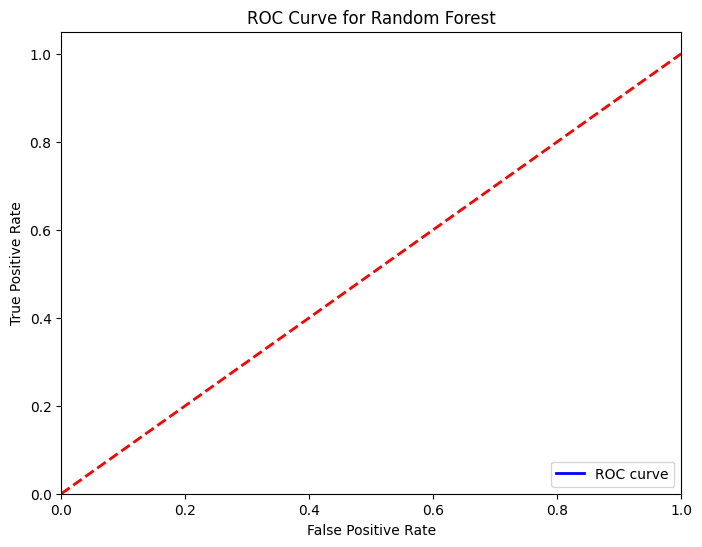

Model: Gradient Boosting
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4442
           1       1.00      1.00      1.00        22

    accuracy                           1.00      4464
   macro avg       1.00      1.00      1.00      4464
weighted avg       1.00      1.00      1.00      4464



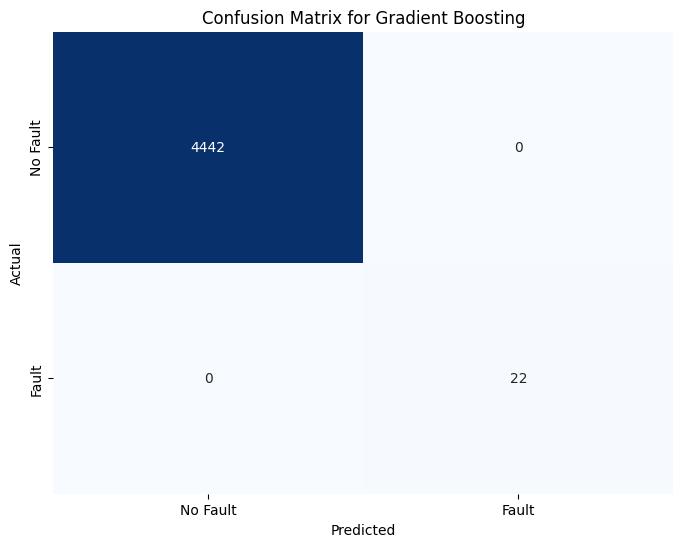

/opt/anaconda3/envs/betzflip-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


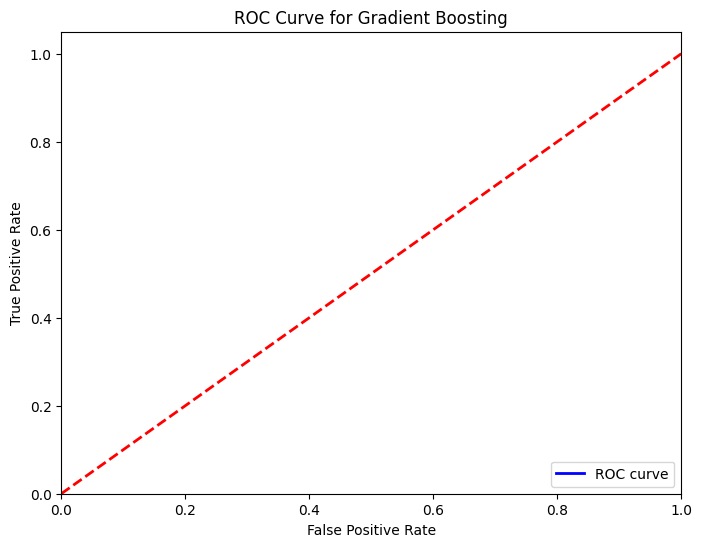

Model: Extra Trees
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4442
           1       1.00      1.00      1.00        22

    accuracy                           1.00      4464
   macro avg       1.00      1.00      1.00      4464
weighted avg       1.00      1.00      1.00      4464



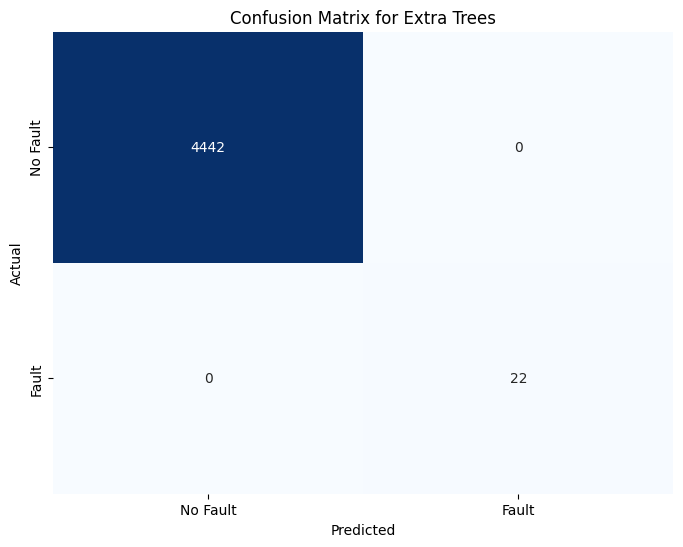

/opt/anaconda3/envs/betzflip-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


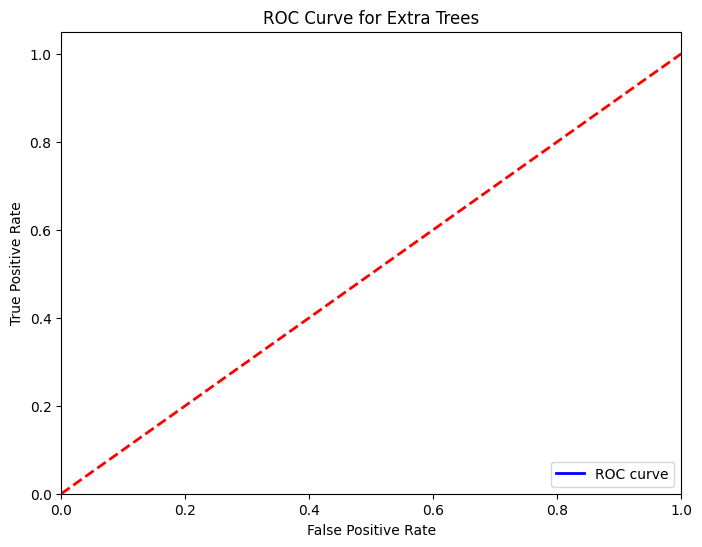

Model: Decision Tree
Accuracy: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4442
           1       1.00      1.00      1.00        22

    accuracy                           1.00      4464
   macro avg       1.00      1.00      1.00      4464
weighted avg       1.00      1.00      1.00      4464



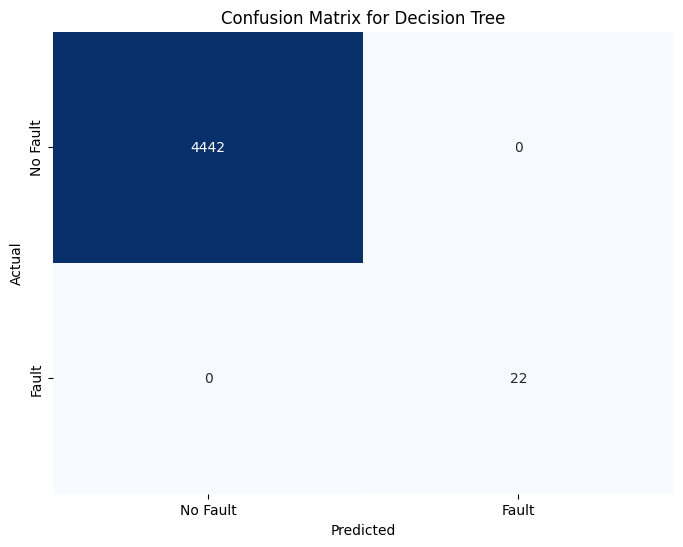

/opt/anaconda3/envs/betzflip-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


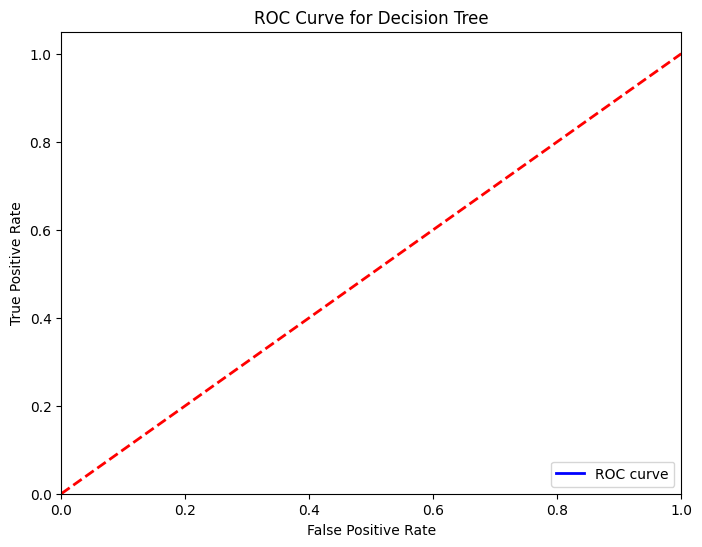

Model: Logistic Regression
Accuracy: 0.9996
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4442
           1       1.00      0.91      0.95        22

    accuracy                           1.00      4464
   macro avg       1.00      0.95      0.98      4464
weighted avg       1.00      1.00      1.00      4464



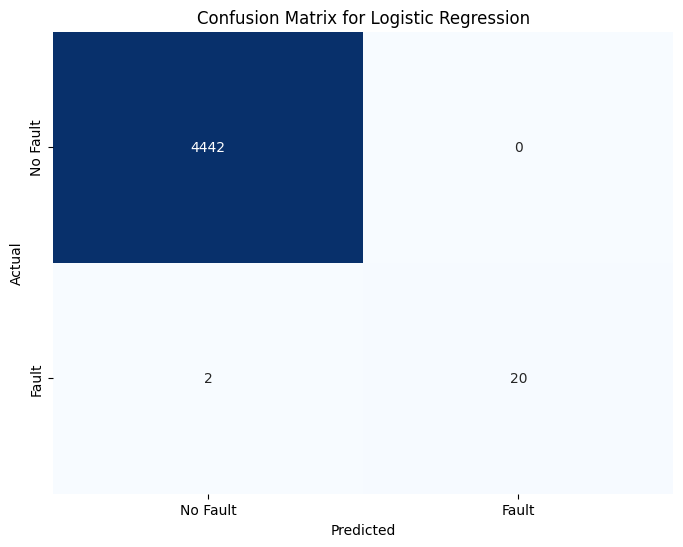

/opt/anaconda3/envs/betzflip-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


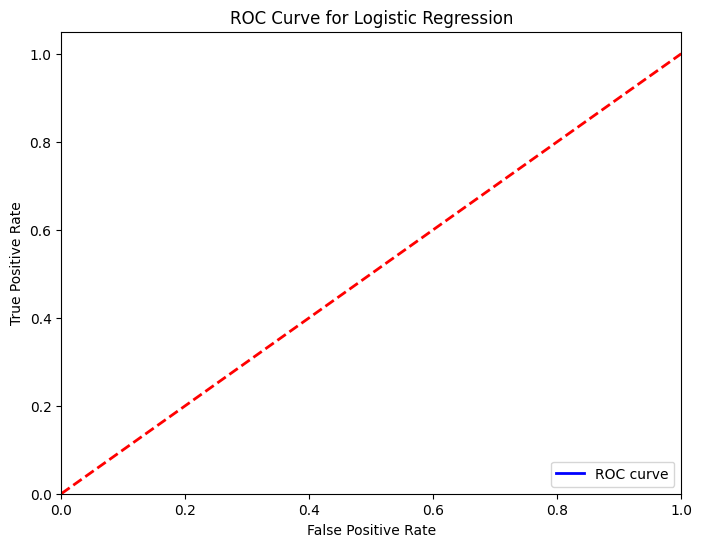

In [19]:
# Training and evaluating each model separately

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Fault', 'Fault'], yticklabels=['No Fault', 'Fault'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# List of models to train
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred)

    # Displaying metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

    # Plotting confusion matrix and ROC curve
    plot_confusion_matrix(cm, model_name)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=2)
    plot_roc_curve(fpr, tpr, model_name)



In [20]:
!pip install shap

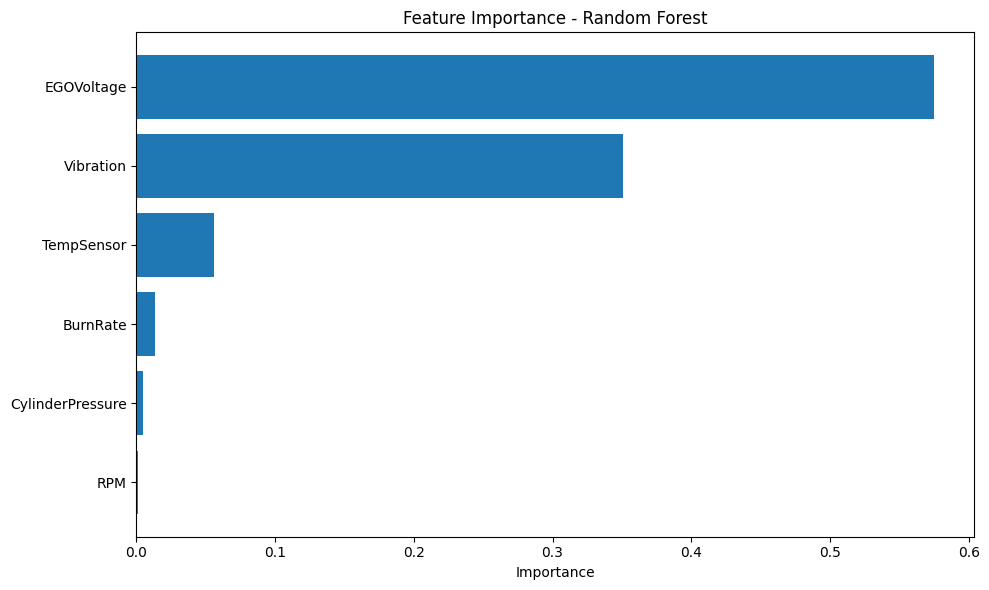

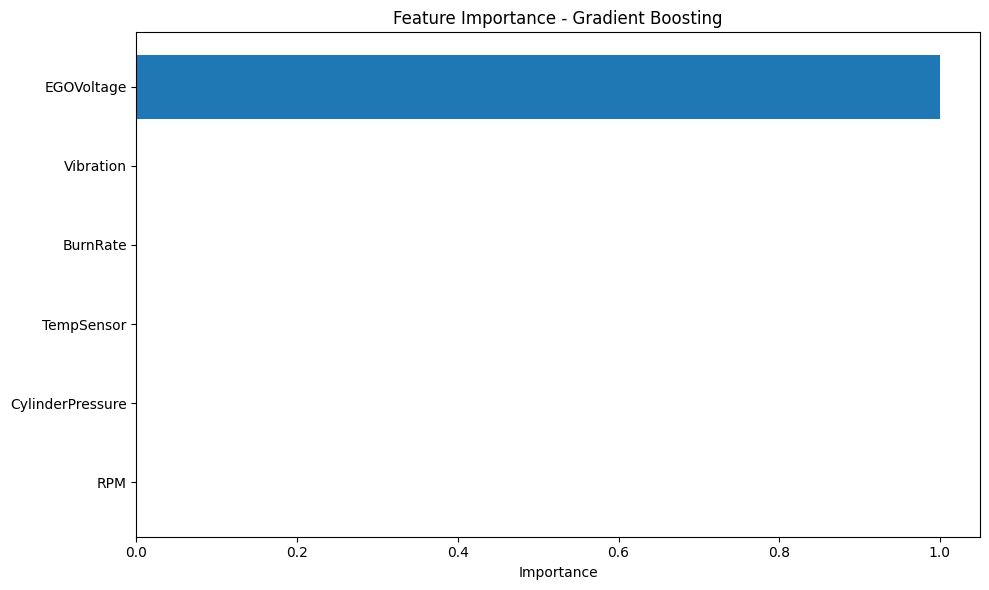

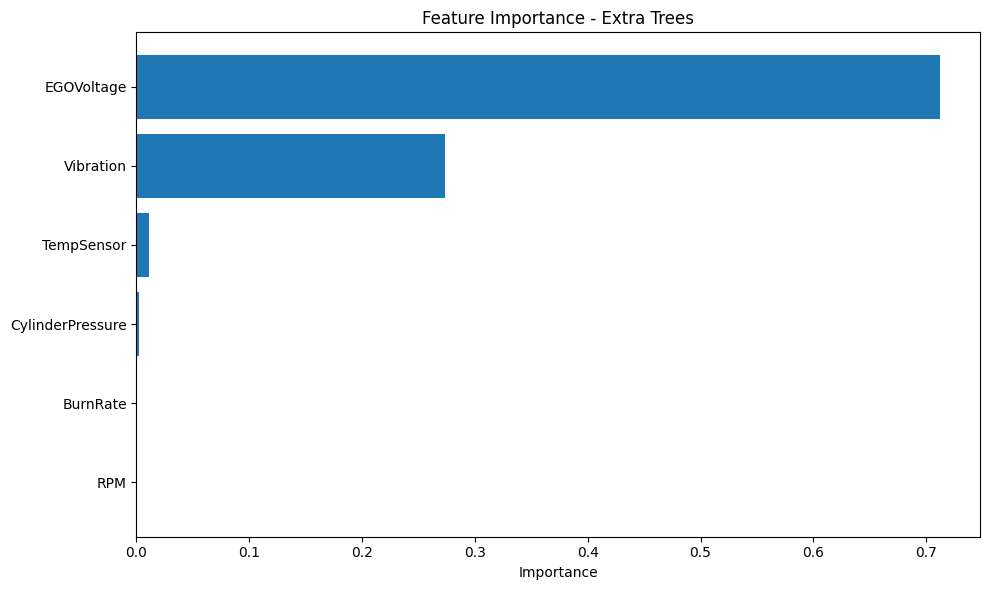

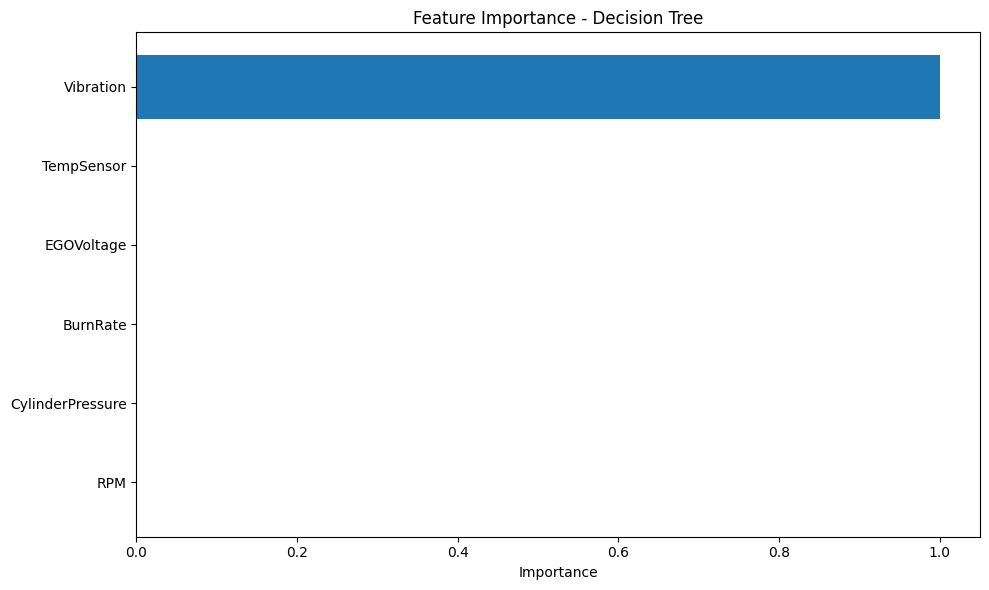

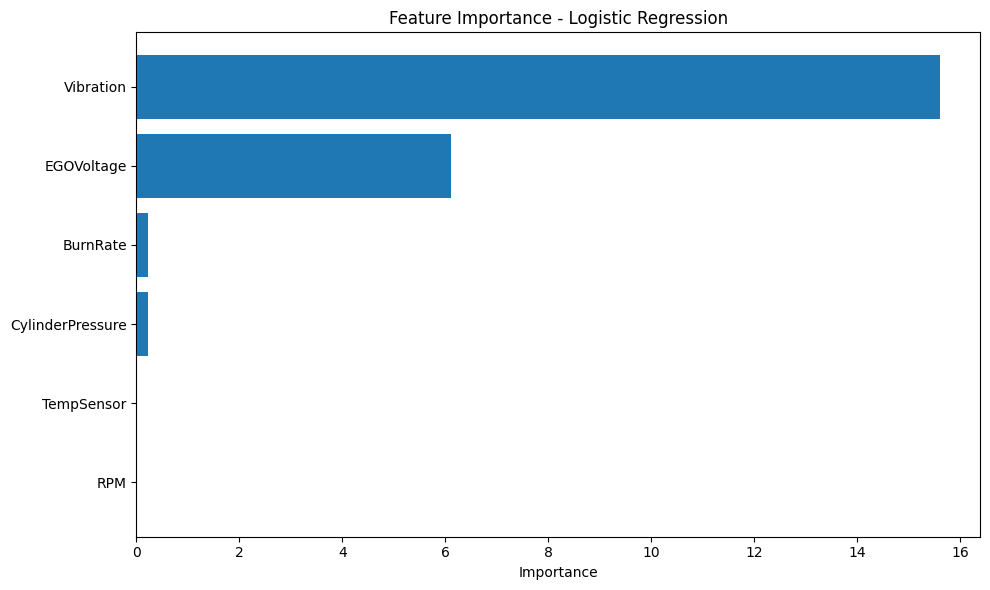

In [21]:
# Function to plot feature importance for each model
def plot_feature_importance(model, X_train, model_name):
    plt.figure(figsize=(10, 6))
    
    # Get feature importance based on model type
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        print(f"Model {model_name} doesn't support feature importance")
        return
        
    # Create and sort feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=True)
    
    # Plot horizontal bar chart
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# Plot feature importance for each model
for model_name, model in models.items():
    plot_feature_importance(model, X_train, model_name)
